In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [14]:
df=pd.read_csv("D:\\Data Analysis\\Data Set\\In Progress\\airbnb.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            14456 non-null  int64  
 1   name          14455 non-null  object 
 2   rating        14456 non-null  object 
 3   reviews       11712 non-null  object 
 4   host_name     14455 non-null  object 
 5   host_id       14017 non-null  float64
 6   address       14429 non-null  object 
 7   features      14429 non-null  object 
 8   amenities     13467 non-null  object 
 9   safety_rules  14247 non-null  object 
 10  hourse_rules  14247 non-null  object 
 11  img_links     14429 non-null  object 
 12  price         14456 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.4+ MB


In [16]:
df['img_links'][2]

'https://a0.muscache.com/im/pictures/miso/Hosting-50699164/original/195db67c-a858-497b-bd8f-1c23df17ee62.jpeg?im_w=720 https://a0.muscache.com/im/pictures/cfa43081-5f9b-42c6-ab30-3e238c920544.jpg?im_w=720 https://a0.muscache.com/im/pictures/a0a56c4e-9859-4b60-b585-0eafdc409bed.jpg?im_w=720 https://a0.muscache.com/im/pictures/ef86d12b-218c-4782-a8f6-fb542c5ef3e0.jpg?im_w=720 https://a0.muscache.com/im/pictures/25a7173b-486f-4013-ab95-928e9f90b40c.jpg?im_w=720 https://a0.muscache.com/im/pictures/54e427bb-9cb7-4a81-94cf-78f19156faad.jpg'

In [17]:
df.isnull().sum()

id                 0
name               1
rating             0
reviews         2744
host_name          1
host_id          439
address           27
features          27
amenities        989
safety_rules     209
hourse_rules     209
img_links         27
price              0
dtype: int64

In [18]:
df.dropna(subset=['name','host_name','address','features'],inplace=True)

In [19]:
df.isnull().sum()

id                 0
name               0
rating             0
reviews         2717
host_name          0
host_id          412
address            0
features           0
amenities        962
safety_rules     182
hourse_rules     182
img_links          0
price              0
dtype: int64

In [20]:
df.drop(columns=['img_links'],inplace=True)

In [21]:
df.duplicated().sum()

588

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
df

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,price
0,49849504,Perla bungalov,4.71,64,Entire bungalow hosted by Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...","₹8,078 per night"
1,50891766,Authentic Beach Architect Sheltered Villa with...,New,NaN,Entire villa hosted by Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...","₹4,665 per night"
2,50699164,cottages sataplia,4.85,68,Entire cabin hosted by Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...","₹5,991 per night"
3,49871422,Sapanca Breathable Bungalow,5.0,13,Entire bungalow hosted by Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...","₹11,339 per night"
4,51245886,Bungalov Ev 2,New,NaN,Entire bungalow hosted by Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...","₹6,673 per night"
...,...,...,...,...,...,...,...,...,...,...,...,...
14451,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Dome hosted by Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠁,C...","Check-in: 3:00 pm - 11:00 pm,Check out: 11:00 ...","₹4,288 per night"
14452,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Tent hosted by Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 10:00 pm,Check out: 12:00 ...","₹15,200 per night"
14453,32977697,Paradise Eco Hub,4.67,3,Private room in dome hosted by Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",Check-in: After 3:00 pm,"₹9,103 per night"
14454,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Dome hosted by Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Check out: 12:00 pm,No pets...","₹42,262 per night"


In [25]:
## Now let's work on the columns one by one

In [26]:
## Changing the data type of price column

In [27]:
df['price'] = df['price'].str.replace(r"[^\d]", "", regex=True).astype(float)

In [28]:
df

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,price
0,49849504,Perla bungalov,4.71,64,Entire bungalow hosted by Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",8078.0
1,50891766,Authentic Beach Architect Sheltered Villa with...,New,NaN,Entire villa hosted by Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",4665.0
2,50699164,cottages sataplia,4.85,68,Entire cabin hosted by Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",5991.0
3,49871422,Sapanca Breathable Bungalow,5.0,13,Entire bungalow hosted by Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",11339.0
4,51245886,Bungalov Ev 2,New,NaN,Entire bungalow hosted by Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",6673.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14451,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Dome hosted by Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠁,C...","Check-in: 3:00 pm - 11:00 pm,Check out: 11:00 ...",4288.0
14452,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Tent hosted by Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 10:00 pm,Check out: 12:00 ...",15200.0
14453,32977697,Paradise Eco Hub,4.67,3,Private room in dome hosted by Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",Check-in: After 3:00 pm,9103.0
14454,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Dome hosted by Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Check out: 12:00 pm,No pets...",42262.0


In [29]:
data = df.copy()  # Creates an independent copy of df

In [30]:
# Function to extract features dynamically
def extract_features(text):
    features = {"Guests": 1, "Bedrooms": 1, "Beds": 1, "Bathrooms": 1}  # Default to 1 if missing

    # Convert text to string to avoid NaN errors
    text = str(text)

    # Find all number-label pairs
    matches = re.findall(r'(\d+)?\s*(guests?|bedrooms?|beds?|bathrooms?|private bathroom|shared bathroom|Toilet with sink)', text)

    for num, label in matches:
        num = int(num) if num else 1  # If number is missing, default to 1
        label = label.lower()

        if "guest" in label:
            features["Guests"] = num
        elif "bedroom" in label:
            features["Bedrooms"] = num
        elif "bed" in label:
            features["Beds"] = num
        elif "bathroom" in label or "toilet" in label:
            if features["Bathrooms"] == 1:  # Only update if default 1 is not needed
                features["Bathrooms"] = num
            else:
                features["Bathrooms"] += num  # Sum different bathroom types

    return pd.Series(features)

# Apply function to extract values from 'features' column
data[['Guests', 'Bedrooms', 'Beds', 'Bathrooms']] = data['features'].apply(extract_features)

# Print final dataframe
data


,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,price,Guests,Bedrooms,Beds,Bathrooms
0,49849504,Perla bungalov,4.71,64,Entire bungalow hosted by Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",8078.0,2,2,1,1
1,50891766,Authentic Beach Architect Sheltered Villa with...,New,NaN,Entire villa hosted by Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",4665.0,4,2,2,2
2,50699164,cottages sataplia,4.85,68,Entire cabin hosted by Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",5991.0,4,1,3,1
3,49871422,Sapanca Breathable Bungalow,5.0,13,Entire bungalow hosted by Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",11339.0,4,1,2,1
4,51245886,Bungalov Ev 2,New,NaN,Entire bungalow hosted by Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",6673.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Dome hosted by Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠁,C...","Check-in: 3:00 pm - 11:00 pm,Check out: 11:00 ...",4288.0,4,1,1,8
14452,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Tent hosted by Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 10:00 pm,Check out: 12:00 ...",15200.0,2,1,1,1
14453,32977697,Paradise Eco Hub,4.67,3,Private room in dome hosted by Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",Check-in: After 3:00 pm,9103.0,2,1,2,1
14454,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Dome hosted by Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Check out: 12:00 pm,No pets...",42262.0,8,2,4,5


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13841 entries, 0 to 14455
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13841 non-null  int64  
 1   name          13841 non-null  object 
 2   rating        13841 non-null  object 
 3   reviews       11211 non-null  object 
 4   host_name     13841 non-null  object 
 5   host_id       13460 non-null  float64
 6   address       13841 non-null  object 
 7   features      13841 non-null  object 
 8   amenities     12915 non-null  object 
 9   safety_rules  13667 non-null  object 
 10  hourse_rules  13667 non-null  object 
 11  price         13841 non-null  float64
 12  Guests        13841 non-null  int64  
 13  Bedrooms      13841 non-null  int64  
 14  Beds          13841 non-null  int64  
 15  Bathrooms     13841 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memory usage: 1.8+ MB


In [32]:
data.isnull().sum()

id                 0
name               0
rating             0
reviews         2630
host_name          0
host_id          381
address            0
features           0
amenities        926
safety_rules     174
hourse_rules     174
price              0
Guests             0
Bedrooms           0
Beds               0
Bathrooms          0
dtype: int64

In [33]:
df[['check_in', 'check_out', 'misc', 'animal_friendly']] = df['hourse_rules'].str.split(',', n=3, expand=True).fillna("Not specified")

In [34]:
df.drop(columns=['misc', 'animal_friendly'], inplace=True)

In [35]:
df['check_in'] = df['check_in'].str.replace('Check-in:', '', regex=False)

In [36]:
df['check_out'] = df['check_out'].str.replace('Check out:', '', regex=False)

In [37]:
df["name"] = df["name"].str.replace("#", "", regex=False)

In [125]:
df["name"] = df["name"].str.replace("!", "", regex=False)

In [38]:
df.isnull().sum()

id                 0
name               0
rating             0
reviews         2630
host_name          0
host_id          381
address            0
features           0
amenities        926
safety_rules     174
hourse_rules     174
price              0
check_in           0
check_out          0
dtype: int64

In [39]:
df[['hourse_rules', 'safety_rules','amenities']] = df[['hourse_rules', 'safety_rules','amenities']].fillna('Not Specified')

In [40]:
df.isnull().sum()

id                 0
name               0
rating             0
reviews         2630
host_name          0
host_id          381
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
price              0
check_in           0
check_out          0
dtype: int64

In [41]:
df['reviews']=df['reviews'].fillna(0)

In [42]:
df['reviews'] = df['reviews'].astype(str).str.replace(',', '').astype(int)

In [43]:
df['rating'] = df['rating'].str.replace('New', '0')
df['rating'] = df['rating'].astype(float)  # Convert to float

In [44]:
# Group by 'name' and compute the weighted average rating per name
df_avg = df.groupby('name').apply(
    lambda x: (x['rating'] * x['reviews']).sum() / x['reviews'].sum()
).reset_index(name='average_rating')

# Merge back to the original dataset
df = df.merge(df_avg, on='name', how='left')

C:\Users\libha\AppData\Local\Temp\ipykernel_18124\2219139465.py:3: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: (x['rating'] * x['reviews']).sum() / x['reviews'].sum()
C:\Users\libha\AppData\Local\Temp\ipykernel_18124\2219139465.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_avg = df.groupby('name').apply(


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13841 entries, 0 to 13840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              13841 non-null  int64  
 1   name            13841 non-null  object 
 2   rating          13841 non-null  float64
 3   reviews         13841 non-null  int32  
 4   host_name       13841 non-null  object 
 5   host_id         13460 non-null  float64
 6   address         13841 non-null  object 
 7   features        13841 non-null  object 
 8   amenities       13841 non-null  object 
 9   safety_rules    13841 non-null  object 
 10  hourse_rules    13841 non-null  object 
 11  price           13841 non-null  float64
 12  check_in        13841 non-null  object 
 13  check_out       13841 non-null  object 
 14  average_rating  11236 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 1.5+ MB


In [46]:
df.isnull().sum()

id                   0
name                 0
rating               0
reviews              0
host_name            0
host_id            381
address              0
features             0
amenities            0
safety_rules         0
hourse_rules         0
price                0
check_in             0
check_out            0
average_rating    2605
dtype: int64

In [47]:
df['average_rating']=df['average_rating'].fillna(0)

In [48]:
df['name'] = df['name'].str.replace(r'\bbungalov\b', 'bungalow', case=False, regex=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13841 entries, 0 to 13840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              13841 non-null  int64  
 1   name            13841 non-null  object 
 2   rating          13841 non-null  float64
 3   reviews         13841 non-null  int32  
 4   host_name       13841 non-null  object 
 5   host_id         13460 non-null  float64
 6   address         13841 non-null  object 
 7   features        13841 non-null  object 
 8   amenities       13841 non-null  object 
 9   safety_rules    13841 non-null  object 
 10  hourse_rules    13841 non-null  object 
 11  price           13841 non-null  float64
 12  check_in        13841 non-null  object 
 13  check_out       13841 non-null  object 
 14  average_rating  13841 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 1.5+ MB


In [50]:
df.head(50)

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,price,check_in,check_out,average_rating
0,49849504,Perla bungalow,4.71,64,Entire bungalow hosted by Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",8078.0,Flexible,12:00 pm,4.71
1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,Entire villa hosted by Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",4665.0,4:00 pm - 11:00 pm,10:00 am,0.00
2,50699164,cottages sataplia,4.85,68,Entire cabin hosted by Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",5991.0,After 1:00 pm,12:00 pm,4.85
3,49871422,Sapanca Breathable Bungalow,5.00,13,Entire bungalow hosted by Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",11339.0,After 2:00 pm,12:00 pm,5.00
4,51245886,bungalow Ev 2,0.00,0,Entire bungalow hosted by Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",6673.0,After 2:00 pm,12:00 pm,0.00
5,48650769,CasaMia White Suite Treehouse,0.00,0,Treehouse hosted by Casamia,261290482.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,2 beds,1 bathroom","Lake view,Mountain view,Waterfront,Wifi,Dedica...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",14729.0,After 2:00 pm,12:00 pm,0.00
6,50765985,Ladin Bungalow,0.00,0,Entire bungalow hosted by Stephen,15084529.0,"Kaş, Antalya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Garden view,Mountain view,Kitchen,Wifi,Dedicat...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 3:00 pm,Check out: 11:00 am,No...",12312.0,After 3:00 pm,11:00 am,0.00
7,40947216,Lavender House,0.00,0,Treehouse hosted by Caner,318794897.0,"Akçalı, Giresun, Turkey","8 guests,1 bedroom,2 beds,1 bathroom","Wifi,Dedicated workspace,Free parking on premi...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Self check-in with building...",13655.0,Flexible,Self check-in with building staff,0.00
8,34043569,Prince's,0.00,0,Entire bungalow hosted by Tu,221057563.0,"Thành phố Đà Lạt, Lâm Đồng, Vietnam","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 11:00 am,Se...",1747.0,After 1:00 pm,11:00 am,0.00
9,42075682,"The Cottage, Private Pool Villa",4.67,3,Entire home hosted by Sukanya,173126583.0,"Tambon Bang Kachai, Chang Wat Chanthaburi, Tha...","10 guests,4 bedrooms,6 beds,3 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 3:00 pm,No smoking,No pets",30486.0,After 3:00 pm,No smoking,4.67


In [51]:
df.isnull().sum()

id                  0
name                0
rating              0
reviews             0
host_name           0
host_id           381
address             0
features            0
amenities           0
safety_rules        0
hourse_rules        0
price               0
check_in            0
check_out           0
average_rating      0
dtype: int64

In [52]:
# KPI's
# corelation between check_in and check_out -
# top 10 Most expensive hotel -
# Corelation between count bedrooms and price-
# Most hotel's with flexible check_in-
# 10 cities with most expensive hotels -
# Top 10 best rated hotel-
# Most visited hotel-
# Most visited hotel (City-wise)-
# Top 10 Best Rated Hotels (City-wise)-

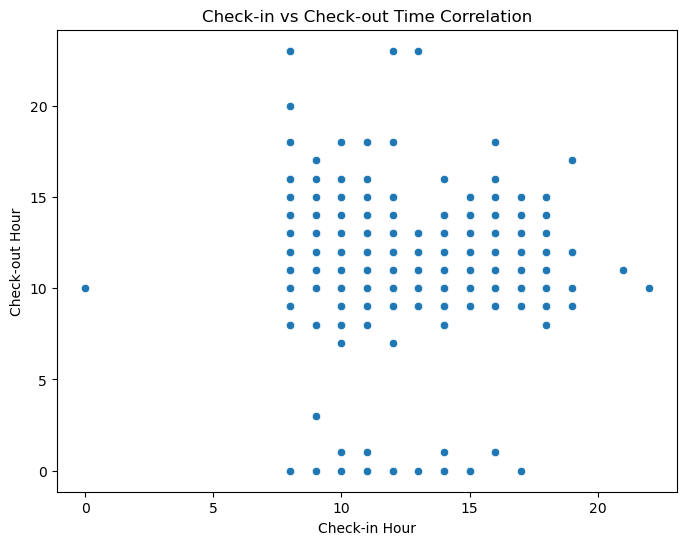

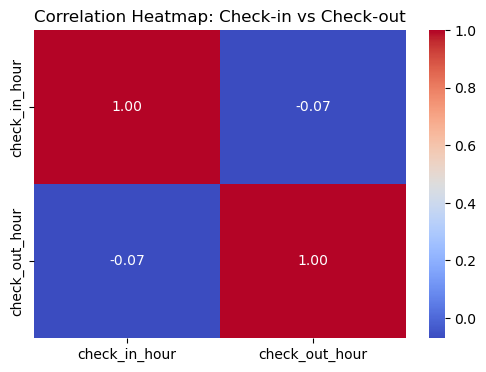

In [53]:
def extract_time(time_str):
    if pd.isna(time_str) or "Flexible" in time_str:
        return None  # Handle missing or flexible times
    return time_str.split('-')[0].strip()  # Take first part of range

# Apply extraction function
df['check_in'] = df['check_in'].apply(extract_time)
df['check_out'] = df['check_out'].apply(extract_time)

# Convert times to datetime format
df['check_in'] = pd.to_datetime(df['check_in'], format='%I:%M %p', errors='coerce')
df['check_out'] = pd.to_datetime(df['check_out'], format='%I:%M %p', errors='coerce')

# Extract hours for correlation
df['check_in_hour'] = df['check_in'].dt.hour
df['check_out_hour'] = df['check_out'].dt.hour

# Drop missing values (if necessary)
df = df.dropna(subset=['check_in_hour', 'check_out_hour'])

# 🔹 Scatter plot: Check-in vs Check-out
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['check_in_hour'], y=df['check_out_hour'])
plt.xlabel("Check-in Hour")
plt.ylabel("Check-out Hour")
plt.title("Check-in vs Check-out Time Correlation")
plt.show()

# 🔹 Heatmap for correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df[['check_in_hour', 'check_out_hour']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Check-in vs Check-out")
plt.show()

**Check-in vs. Check-out Analysis**

1. Weak Correlation (-0.07):
   - Check-in time has "little to no influence" on check-out time.
   - Many hotels likely have "fixed check-out policies" (e.g., 10 AM - 12 PM).

2. Fixed Check-out Patterns:
   - Regardless of check-in time, most check-outs happen "within a specific window".
   - Some guests might stay longer based on "flexible policies or late check-out options".

3. Next Steps for Deeper Analysis:
   - Segment Data: Compare business travelers vs. tourists.
   - Analyze by Day: Weekend vs. weekday trends.
   - Regression Analysis: Check for hidden patterns in stay durations.

Conclusion:
The data suggests that check-out times are mostly predefined, with little dependency on check-in times. Further segmentation may reveal interesting trends

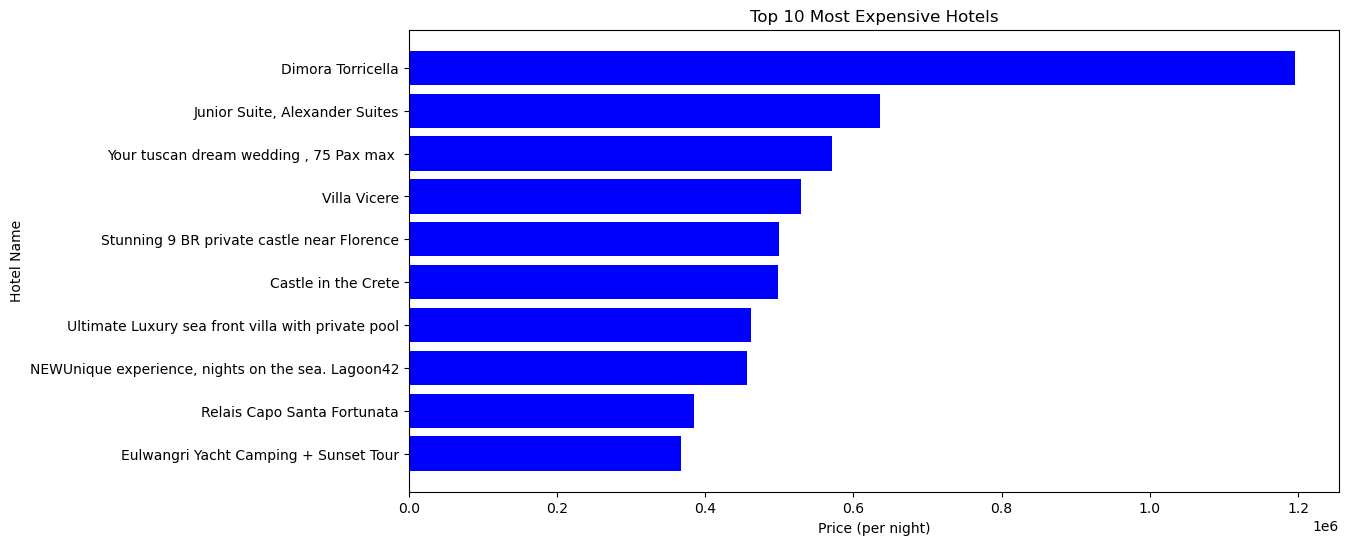

In [127]:
# Step 1: Get the top 10 most expensive hotels
top_10_hotels = df.nlargest(10, "price")

# Step 2: Plot a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_10_hotels["name"], top_10_hotels["price"], color='blue')

# Step 3: Add labels & title
plt.xlabel("Price (per night)")
plt.ylabel("Hotel Name")
plt.title("Top 10 Most Expensive Hotels")
plt.gca().invert_yaxis()  # Invert to show the highest price at the top

# Show the plot
plt.show()


**Top 10 Most Expensive Hotels Chart**  

1. Extreme Price Difference
   - Dimora Torricella stands out as the most expensive hotel, with a significantly higher price per night compared to the rest.  
   - The price gap between the top hotel and the second most expensive hotel is substantial.  

2. Luxury Dominates the Market  
   - Many of the hotels in the list include luxury villas, castles, and suites, indicating that high-end accommodations dominate the most expensive hotel category.  
   - Unique experiences, such as yacht stays and private wedding venues, contribute to the high pricing.  

3. Price Gradual Decrease 
   - The second and third most expensive hotels have relatively closer pricing, while the remaining hotels show a steady decline in cost.  
   - The bottom few hotels in the list still hold premium pricing but are significantly lower than the top ones.  

4. Diverse Accommodation Types  
   - The list includes a mix of private villas, wedding venues, and seaside resorts, showing a range of luxury offerings catering to different types of wealthy travelers.  

5. Market Trend in High-End Hospitality  
   - The presence of private islands, castles, and large suites suggests that exclusivity and privacy are key factors driving premium pricing in the hospitality industry.  
   - Waterfront locations and unique experiences (such as yacht stays) also contribute to the high costs.

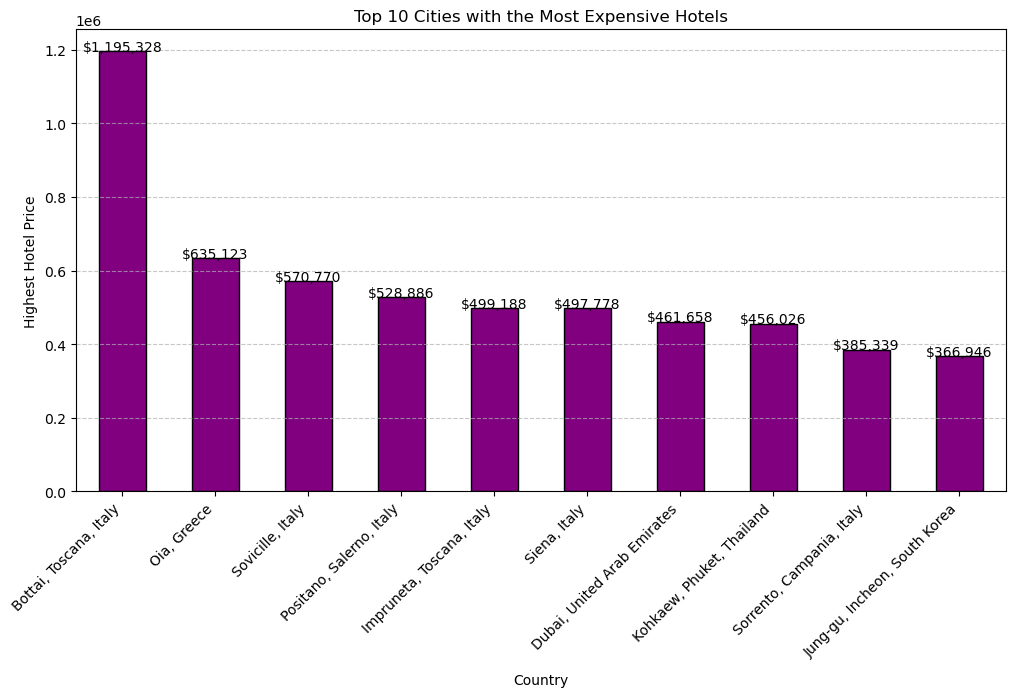

In [56]:
# Get the top 10 countries with the most expensive hotels
top_expensive_countries = df.groupby("address")["price"].max().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
bars = top_expensive_countries.plot(kind="bar", color="purple", edgecolor="black")

# Annotate values on top of bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f"${bar.get_height():,.0f}", ha='center', fontsize=10, color='black')

# Labels & Title
plt.xlabel("Country", labelpad=10)
plt.ylabel("Highest Hotel Price")
plt.title("Top 10 Cities with the Most Expensive Hotels")

# Adjust country labels slightly left
plt.xticks(rotation=45, ha='right', x=[i - 0.1 for i in range(len(top_expensive_countries))])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Top 10 Cities with the Most Expensive Hotels**

1. Bottai, Toscana, Italy has the most expensive hotel
   - It leads with a staggering price of $1,195,328, which is significantly higher than the rest.

2. Italy dominates the list
   - Out of the top 10 most expensive hotel locations, 5 are in Italy (Bottai, Sovicille, Positano, Impruneta, and Sorrento).
   - This suggests that luxury hotels in Italy are among the priciest worldwide.

3. Oía, Greece holds second place
   - The highest hotel price in Oía, Greece is $635,123, nearly half of the price of the top-ranked city.

4. Dubai and Phuket also make the list
   - Dubai, UAE ($461,658) and Konkaew, Phuket, Thailand ($456,026) are notable luxury destinations.
   - Their presence in the ranking highlights their high-end tourism appeal.

5. The price gap between cities is significant
   - While Bottai, Toscana, Italy leads at $1.2M, the 10th-ranked city, Jung-gu, Incheon, South Korea, has a price of $366,946.
   - This shows a massive disparity in luxury hotel pricing worldwide.


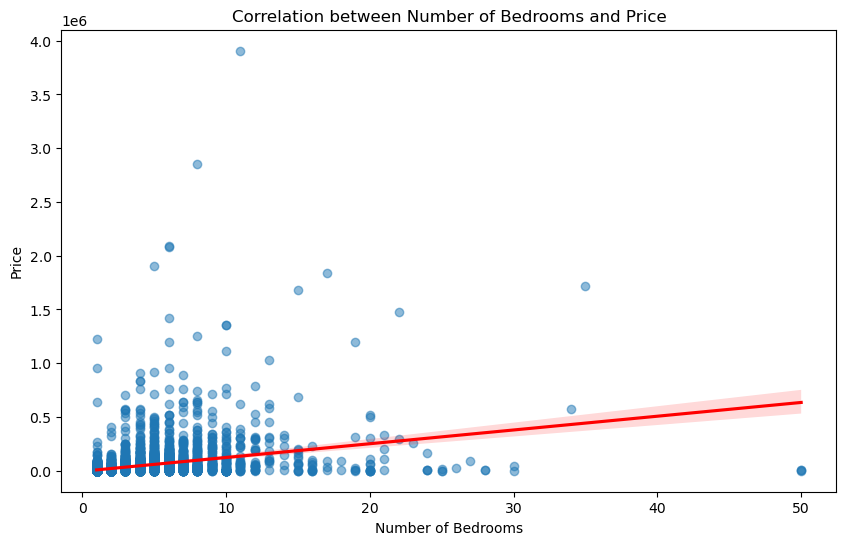

In [58]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=data['Bedrooms'], y=data['price'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Correlation between Number of Bedrooms and Price")

# Show plot
plt.show()

**Correlation between Number of Bedrooms and Price**
1. Weak Positive Correlation
   - The regression line has a slight upward slope, indicating that as the number of bedrooms increases, price tends to increase.
   - However, the relationship is not very strong, as the data points are widely scattered.

2. High Variability in Prices
   - Many listings have similar bedroom counts but significantly different prices.
   - This suggests that factors "other than just bedroom count" (e.g., location, amenities, property type) play a major role in determining price.

3. Presence of Outliers
   - Some properties have "extremely high prices" compared to others with the same bedroom count.
   - These could be "luxury properties or pricing anomalies".

4. Long-Tailed Distribution
   - Most properties have "fewer than 10 bedrooms", while some have "30+ bedrooms", but those are rare.
   - This long tail can "skew" the regression line.

In [60]:
flexible_hotels = data[
    data["safety_rules"].str.contains("Check-in: Flexible", case=True, na=False) |
    data["hourse_rules"].str.contains("Check-in: Flexible", case=True, na=False)
]

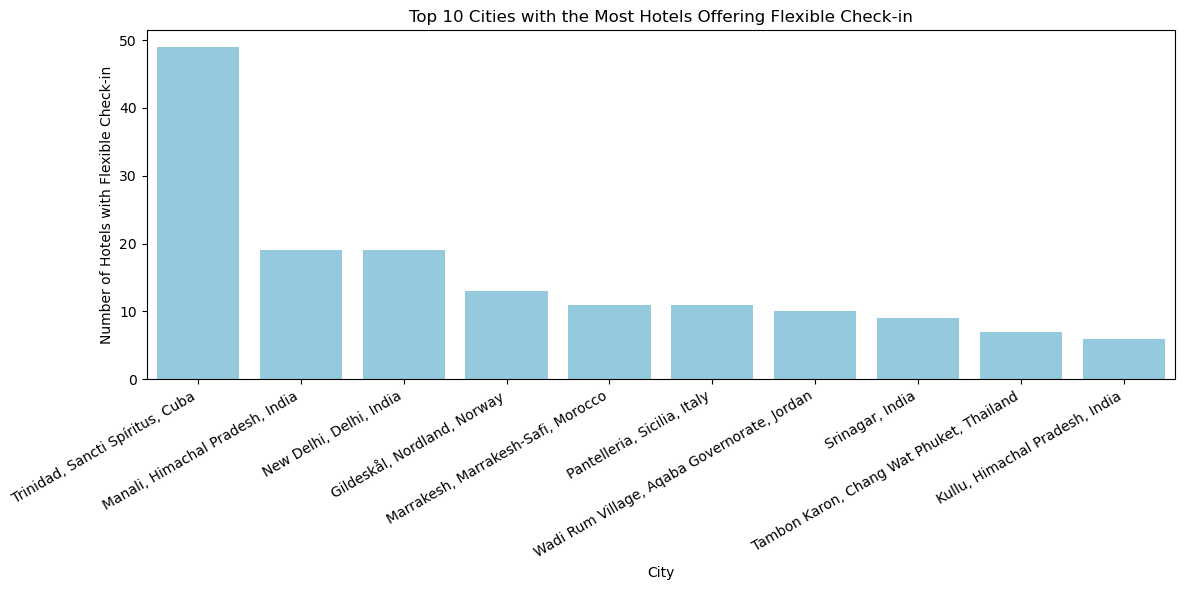

In [61]:
# Count flexible check-in hotels by city
flexible_count = flexible_hotels["address"].value_counts().head(10)


# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Create the barplot using Seaborn
sns.barplot(x=flexible_count.index, y=flexible_count.values, color="#87CEEB")

# Add labels and title
plt.xlabel("City")
plt.ylabel("Number of Hotels with Flexible Check-in")
plt.title("Top 10 Cities with the Most Hotels Offering Flexible Check-in")

# Rotate x-axis labels for better alignment
plt.xticks(rotation=30, ha="right")

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Show plot
plt.show()



**Top 10 Cities with the Most Hotels Offering Flexible Check-in**

1. Leading City
   Trinidad, Sancti Spiritus, Cuba has the highest number of hotels offering flexible check-in,
   reaching nearly 50 hotels. This suggests a strong emphasis on traveler convenience in this city.

2. Prominent Cities in India
   Manali, Himachal Pradesh, India and New Delhi, Delhi, India each have nearly 20 hotels offering flexible check-in,
   making India a notable location for flexible accommodation options.

3. Global Distribution
   The list includes cities from Cuba, India, Norway, Morocco, Italy, Jordan, Thailand, and Mongolia,
    indicating that flexible check-in policies are a global trend rather than a region-specific feature.

4. Moderate Availability
   Cities like Gildeskål (Norway), Marrakesh-Safi (Morocco), Pantelleria (Italy), Wadi Rum Village (Jordan),
   and Srinagar (India) have around 10-15 hotels with flexible check-in, showing moderate adoption of this service.

5. Lower End of the List
   Tambon Karon, Chang Wat Phuket (Thailand) and Hatgal, Khövsgöl (Mongolia) have relatively fewer
   hotels providing flexible check-in, suggesting that this amenity might be less common in these regions.

Conclusion
   This chart highlights the diverse geographical spread of hotels with flexible check-in policies,
   with Cuba and India being the most prominent. It reflects how different countries prioritize guest convenience,
   with some cities emerging as hospitality hotspots for flexible travel arrangements.

C:\Users\libha\AppData\Local\Temp\ipykernel_18124\2835871109.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_rated_hotels["average_rating"], y=top_rated_hotels["name"], palette="Blues_r")
C:\Users\libha\AppData\Local\Temp\ipykernel_18124\2835871109.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=top_10_city_hotels["average_rating"], y=top_10_city_hotels["address"], palette="Reds_r")


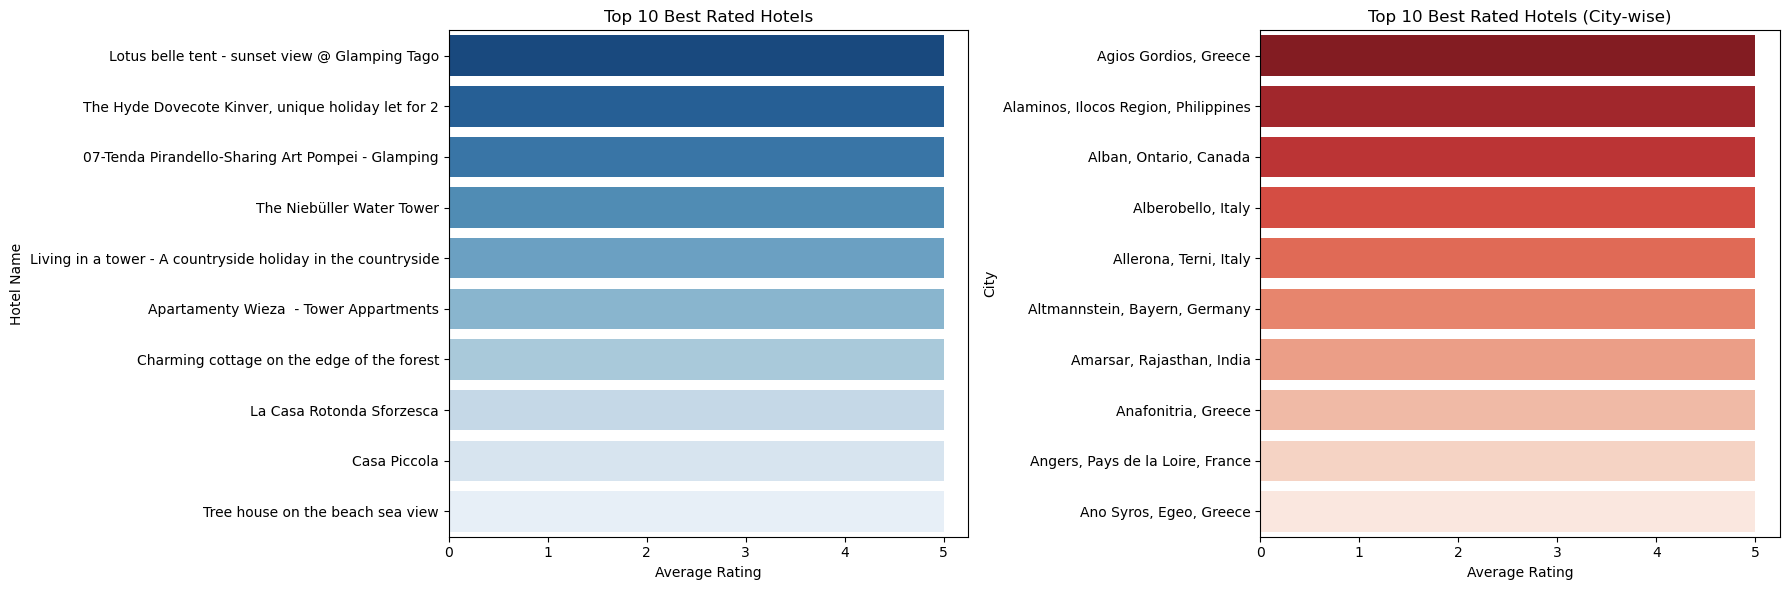

In [63]:
# Sort dataset by individual hotel rating and select top 10 hotels
top_rated_hotels = df.sort_values(by="average_rating", ascending=False).head(10)

# Group by city and calculate the average rating
city_avg_rating = df.groupby("address")["average_rating"].mean().reset_index()

# Select the top 10 cities with the highest average rating
top_10_city_hotels = city_avg_rating.nlargest(10, "average_rating")

# Set figure size for two plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Top 10 Best Rated Hotels
sns.barplot(ax=axes[0], x=top_rated_hotels["average_rating"], y=top_rated_hotels["name"], palette="Blues_r")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("Hotel Name")
axes[0].set_title("Top 10 Best Rated Hotels")

# Plot 2: Top 10 Best Rated Cities
sns.barplot(ax=axes[1], x=top_10_city_hotels["average_rating"], y=top_10_city_hotels["address"], palette="Reds_r")
axes[1].set_xlabel("Average Rating")
axes[1].set_ylabel("City")
axes[1].set_title("Top 10 Best Rated Hotels (City-wise)")

# Adjust layout for better readability
plt.tight_layout()

# Show plot
plt.show()

**Top 10 Best Rated Hotels and City-wise Analysis**

Top 10 Best Rated Hotels:
- The left chart showcases the highest-rated hotels irrespective of location.
- These hotels have consistently received excellent reviews from guests.
- The ranking is based on the highest average ratings from customer feedback.

Top 10 Best Rated Hotels City-wise:
- The right chart highlights the top-rated hotels across different cities.
- This visualization ensures diversity by selecting the highest-rated hotel per city.
- It helps in identifying cities that host premium accommodations with high guest satisfaction.

Key Observations:
- Certain hotels have significantly higher ratings, indicating exceptional service and customer satisfaction.
- Cities with multiple high-rated hotels can be considered prime locations for quality accommodation.
- The analysis helps travelers and business stakeholders in choosing top-tier hotels or investing in hospitality sectors of specific cities.

C:\Users\libha\AppData\Local\Temp\ipykernel_18124\1718232699.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_most_visited_hotels["reviews"], y=top_10_most_visited_hotels["name"], palette="coolwarm")
C:\Users\libha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


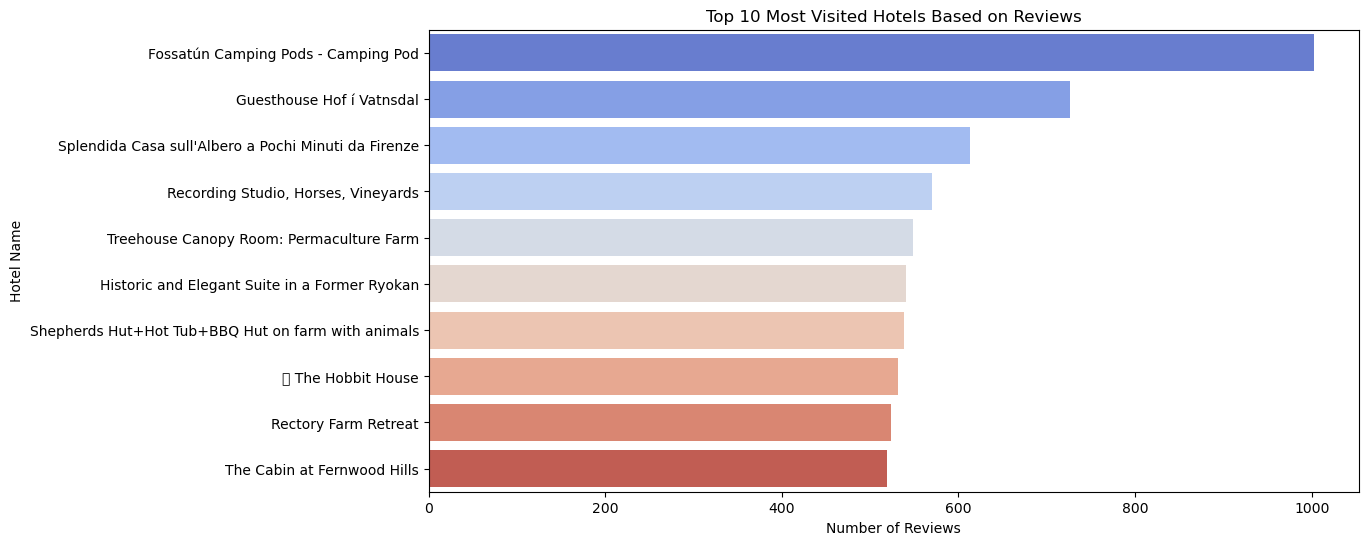

In [65]:
# Sort dataset by the number of reviews and select the top 10 hotels
top_10_most_visited_hotels = df.sort_values(by="reviews", ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_most_visited_hotels["reviews"], y=top_10_most_visited_hotels["name"], palette="coolwarm")
plt.xlabel("Number of Reviews")
plt.ylabel("Hotel Name")
plt.title("Top 10 Most Visited Hotels Based on Reviews")
plt.show()


**Top 10 Most Visited Hotels Based on Reviews**

- Fossatún Camping Pods - Camping Pod has the highest number of reviews, making it the most visited hotel in the dataset.
- Guesthouse Hof í Vatnsdal and Splendida Casa sull'Albero a Pochi Minuti da Firenze follow as the next most visited hotels.
- The list features a diverse range of accommodations, including camping pods, farm retreats, and themed hotels, indicating varying traveler preferences.
- Unique accommodations such as treehouses, recording studios, and hobbit-themed houses are highly reviewed, showing a trend toward experiential stays.
- The dataset suggests that non-traditional lodging experiences attract a large number of reviews, highlighting their popularity among travelers.

Interpretation:
Hotels that offer unique and immersive experiences, such as themed stays, farmhouses, and eco-retreats, tend to receive a significant number of reviews.
This trend indicates a growing preference for distinctive lodging options over conventional hotels.

C:\Users\libha\AppData\Local\Temp\ipykernel_18124\286083098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_hotels_citywise["reviews"], y=top_10_hotels_citywise["address"], palette="coolwarm")


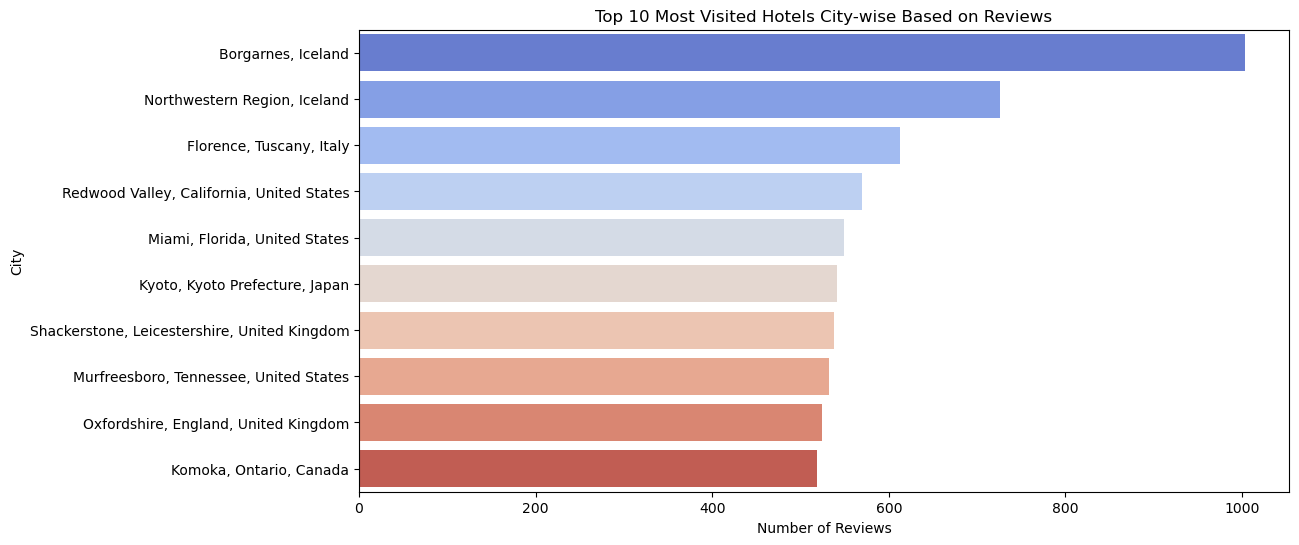

In [67]:
# Group by city and select the hotel with the highest reviews in each city
top_hotels_citywise = df.loc[df.groupby("address")["reviews"].idxmax()]

# Sort by reviews and select the top 10 cities
top_10_hotels_citywise = top_hotels_citywise.sort_values(by="reviews", ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_hotels_citywise["reviews"], y=top_10_hotels_citywise["address"], palette="coolwarm")
plt.xlabel("Number of Reviews")
plt.ylabel("City")
plt.title("Top 10 Most Visited Hotels City-wise Based on Reviews")
plt.show()


**Top 10 Most Visited Hotels City-wise Based on Reviews**

- Borgarnes, Iceland has the highest number of reviews, making it the most visited hotel city in the dataset.
- Iceland has two cities (Borgarnes and Northwestern Region) in the top 10, indicating its popularity among travelers.
- Florence, Tuscany, Italy and Redwood Valley, California, United States follow as the next most visited hotel cities.
- The United States and the United Kingdom each have two cities in the top 10, showing high traveler engagement in these locations.
- Cities from diverse regions, including Europe, North America, and Asia, appear in the top 10, highlighting a global distribution of highly reviewed hotels.

Interpretation:
The dataset suggests that certain locations, particularly in Iceland and the United States, attract a significant number of visitors.
The number of reviews is a strong indicator of tourist interest, making these cities prime spots for the hospitality industry.